**Sonar, Mines vs. Rocks**

Este es el conjunto de datos utilizado por Gorman y Sejnowski en su estudio de la clasificación de señales de sonar. La tarea es entrenar una red para discriminar entre las señales de sonar que rebotan en un cilindro de metal y las que rebotan en una roca aproximadamente cilíndrica.

El archivo “sonar.all-data.csv” contiene 111 patrones obtenidos al hacer rebotar señales de sonar en un cilindro de metal en varios ángulos y bajo diversas condiciones, tambien contiene 97 patrones obtenidos de rocas en condiciones similares. La señal del sonar transmitida es una señal electrica de frecuencia modulada, aumentanda en frecuencia. El conjunto de datos contiene señales obtenidas desde una variedad de ángulos diferentes, que abarcan 90 grados para el cilindro y 180 grados para la roca.

Cada patrón es un conjunto de 60 números en el rango de 0,0 a 1,0. Cada número representa la energía dentro de una banda de frecuencia particular, integrada durante un cierto período de tiempo. La apertura de integración para frecuencias más altas ocurre más tarde en el tiempo, ya que estas frecuencias se transmiten más tarde durante la señal electrica.

La etiqueta asociada a cada registro contiene la letra “R” si el objeto es una roca y “M” si es una mina (cilindro de metal). Los números en las etiquetas están en orden creciente del ángulo, pero no codifican el ángulo directamente.

https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/

**Normalización de datos**

La normalización es un cambio de escala de los datos del rango original para que todos los valores estén dentro del nuevo rango de 0 y 1.

La normalización requiere que conozca o sea capaz de estimar con precisión los valores mínimos y máximos observables. Es posible que pueda estimar estos valores a partir de los datos disponibles.

y = (x – min) / (max – min)

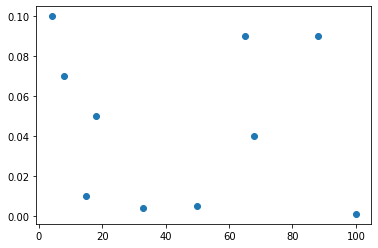

In [32]:
# Ejemplo de normalizacion
import numpy as np
from numpy import asarray
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler

data = asarray([[100, 0.001],
				[8, 0.07],
				[50, 0.005],
				[15, 0.01],
        [18, 0.05],
        [65, 0.09],
        [68, 0.04],
				[33, 0.004],
				[88, 0.09],
				[4, 0.1]])
#print(data)
# Scatter plot
plt.scatter(data[:, 0], data[:, 1], cmap='hot')
# Display the plot
plt.show()

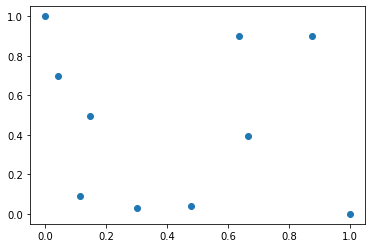

In [33]:
# definimos min max scaler
scaler = MinMaxScaler()
# transformamos data
scaled = scaler.fit_transform(data)
#print(scaled)
# Scatter plot
plt.scatter(scaled[:, 0], scaled[:, 1], cmap='hot')
# Display the plot
plt.show()

**Data Standarization**

La estandarización de un conjunto de datos implica volver a escalar la distribución de valores para que la media de los valores observados sea 0 y la desviación estándar sea 1.

La estandarización supone que sus observaciones se ajustan a una distribución gaussiana (curva de campana) con una media y desviación estándar con buen comportamiento. Puede estandarizar sus datos si no se cumple esta expectativa, pero es posible que no obtenga resultados confiables.

y = (x – mean) / standard_deviation

Restar la media de los datos se denomina centrado, mientras que dividir por la desviación estándar se denomina escalado. Como tal, el método a veces se denomina "escalado central".

In [107]:
from numpy import sqrt 
# Ejemplo de standardizacion
from sklearn.preprocessing import StandardScaler
# define data
data = asarray([[100, 0.001],
				[8, 0.07],
				[50, 0.005],
				[15, 0.01],
        [18, 0.05],
        [65, 0.09],
        [68, 0.04],
				[33, 0.004],
				[88, 0.09],
				[4, 0.1]])
print(data)

[[1.0e+02 1.0e-03]
 [8.0e+00 7.0e-02]
 [5.0e+01 5.0e-03]
 [1.5e+01 1.0e-02]
 [1.8e+01 5.0e-02]
 [6.5e+01 9.0e-02]
 [6.8e+01 4.0e-02]
 [3.3e+01 4.0e-03]
 [8.8e+01 9.0e-02]
 [4.0e+00 1.0e-01]]


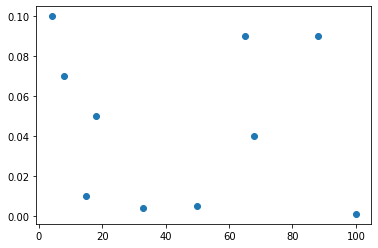

In [109]:
# Scatter plot
plt.scatter(data[:, 0], data[:, 1], cmap='hot')
# Display the plot
plt.show()

In [123]:
#Media de todos los datos del array
r1 = np.mean(data)
print("Media: ", r1)
  
#Dev Std de todos los datos del array
r2 = np.std(data)
print("Dev Std: ", r2)

avgxcolumn = np.average(data, axis = 0)
print("Media x columna: ", avgxcolumn)
media = (avgxcolumn[0] + avgxcolumn[1])/2
print("Media", media)

datos = np.concatenate((data[:,0],data[:,1]))
#print("All array elements", datos)

std_dev_xcolumn = np.std(data, axis = 0)
print("Dev Std x columna: ", std_dev_xcolumn)
print("Dev Std: ", np.std(datos))

print("===========================================================")
print("Standard Scaler from scratch")
print("===========================================================")
x_scaled = (data[:,0] - avgxcolumn[0])/std_dev_xcolumn[0]
print("x_scaled", x_scaled)

y_scaled = (data[:,1] - avgxcolumn[1])/std_dev_xcolumn[1]
print("y_scaled", y_scaled)

print("===========================================================")

#datos_scaled = np.concatenate((x_scaled, y_scaled))
#print(datos_scaled)
#print("Media: ", np.average(datos_scaled))
#print("Dev Std: ", np.std(datos_scaled))

Media:  22.473
Dev Std:  32.17943501834674
Media x columna:  [44.9    0.046]
Media 22.473
Dev Std x columna:  [32.63571663  0.037659  ]
Dev Std:  32.17943501834674
Standard Scaler from scratch
x_scaled [ 1.68833431 -1.13066308  0.15627051 -0.91617415 -0.82425032  0.61588965
  0.70781348 -0.36463118  1.32063899 -1.25322819]
y_scaled [-1.1949336   0.63729792 -1.08871728 -0.95594688  0.10621632  1.16837952
 -0.15932448 -1.11527136  1.16837952  1.43392032]


In [111]:
# definimos standard scaler
scaler = StandardScaler()
# transformamos data
scaled = scaler.fit_transform(data)
print(scaled)
r1 = np.mean(scaled)
print("Media: ", r1)
  
r2 = np.std(scaled)
print("Dev Std: ", r2)
  
#r3 = np.var(scaled)
#print("Variance: ", r3)



[[ 1.68833431 -1.1949336 ]
 [-1.13066308  0.63729792]
 [ 0.15627051 -1.08871728]
 [-0.91617415 -0.95594688]
 [-0.82425032  0.10621632]
 [ 0.61588965  1.16837952]
 [ 0.70781348 -0.15932448]
 [-0.36463118 -1.11527136]
 [ 1.32063899  1.16837952]
 [-1.25322819  1.43392032]]
Media:  3.3306690738754695e-17
Dev Std:  1.0


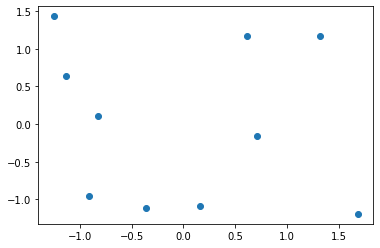

In [112]:
#print(scaled)
# Scatter plot
plt.scatter(scaled[:, 0], scaled[:, 1], cmap='hot')
# Display the plot
plt.show()

In [143]:
# load and summarize the sonar dataset
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from pandas import DataFrame
# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
dataset = read_csv(url, header=None)
# summarize the shape of the dataset
print(dataset.shape)
# summarize each variable
print(dataset.describe())


(208, 61)
               0           1           2           3           4           5   \
count  208.000000  208.000000  208.000000  208.000000  208.000000  208.000000   
mean     0.029164    0.038437    0.043832    0.053892    0.075202    0.104570   
std      0.022991    0.032960    0.038428    0.046528    0.055552    0.059105   
min      0.001500    0.000600    0.001500    0.005800    0.006700    0.010200   
25%      0.013350    0.016450    0.018950    0.024375    0.038050    0.067025   
50%      0.022800    0.030800    0.034300    0.044050    0.062500    0.092150   
75%      0.035550    0.047950    0.057950    0.064500    0.100275    0.134125   
max      0.137100    0.233900    0.305900    0.426400    0.401000    0.382300   

               6           7           8           9   ...          50  \
count  208.000000  208.000000  208.000000  208.000000  ...  208.000000   
mean     0.121747    0.134799    0.178003    0.208259  ...    0.016069   
std      0.061788    0.085152    0.118

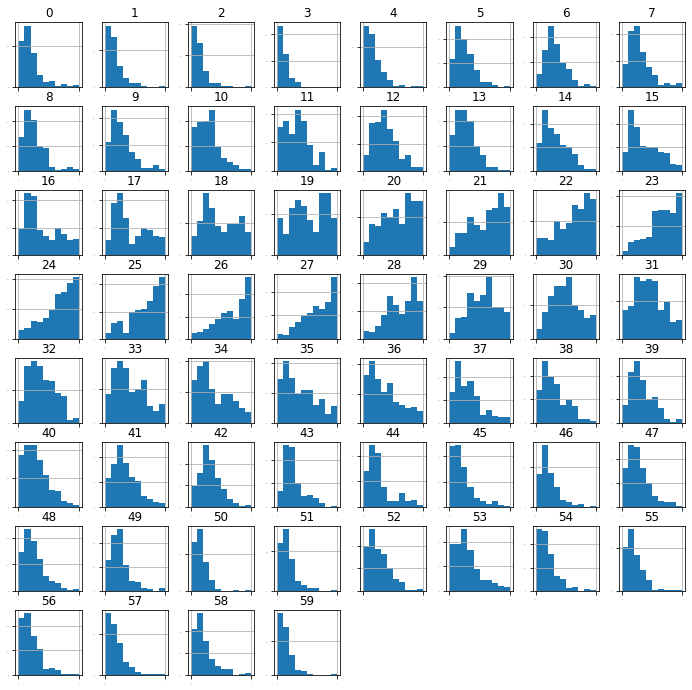

In [168]:
# histograms of the variables
dataset.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(12,12))
pyplot.show()

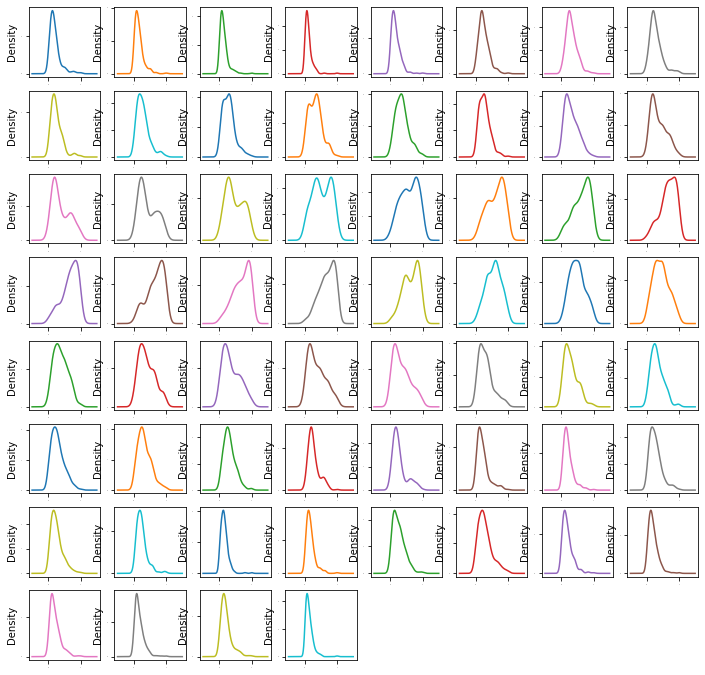

In [169]:
# density
dataset.plot(kind='density', subplots=True, layout=(8,8), sharex=False, legend=False, fontsize=1, figsize=(12,12))
pyplot.show()

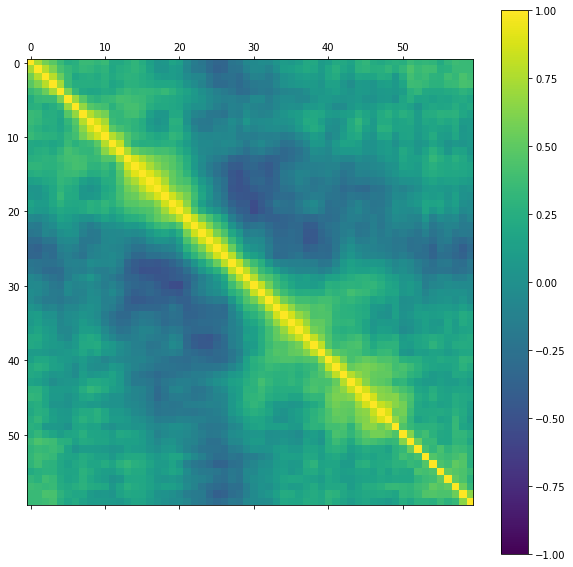

In [170]:
# correlation matrix
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(dataset.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
fig.set_size_inches(10,10)
pyplot.show()

In [163]:
# evaluate knn on the raw sonar dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from pandas import DataFrame
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot
# load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
dataset = read_csv(url, header=None)
data = dataset.values
# separate into input and output columns
X, y = data[:, :-1], data[:, -1]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))
# define and configure the model
model = KNeighborsClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report model performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.797 (0.073)


In [164]:
dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [165]:
dataset.values

array([[0.02, 0.0371, 0.0428, ..., 0.009, 0.0032, 'R'],
       [0.0453, 0.0523, 0.0843, ..., 0.0052, 0.0044, 'R'],
       [0.0262, 0.0582, 0.1099, ..., 0.0095, 0.0078, 'R'],
       ...,
       [0.0522, 0.0437, 0.018, ..., 0.0077, 0.0031, 'M'],
       [0.0303, 0.0353, 0.049, ..., 0.0036, 0.0048, 'M'],
       [0.026, 0.0363, 0.0136, ..., 0.0061, 0.0115, 'M']], dtype=object)

**MinMaxScaler Transform**

Usaremos la configuración default y los valores de escala en el rango 0 y 1. Primero, se define una instancia de MinMaxScaler con hiperparámetros predeterminados. Una vez definida, podemos llamar a la función fit_transform() y pasarla a nuestro conjunto de datos para crear una versión transformada de nuestro conjunto de datos.

In [166]:
# perform a robust scaler transform of the dataset
trans = MinMaxScaler()
data = trans.fit_transform(dataset.values[:, :-1])

               0           1           2           3           4           5   \
count  208.000000  208.000000  208.000000  208.000000  208.000000  208.000000   
mean     0.204011    0.162180    0.139068    0.114342    0.173732    0.253615   
std      0.169550    0.141277    0.126242    0.110623    0.140888    0.158843   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.087389    0.067938    0.057326    0.044163    0.079508    0.152714   
50%      0.157080    0.129447    0.107753    0.090942    0.141517    0.220236   
75%      0.251106    0.202958    0.185447    0.139563    0.237319    0.333042   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

               6           7           8           9   ...          50  \
count  208.000000  208.000000  208.000000  208.000000  ...  208.000000   
mean     0.320472    0.285114    0.252485    0.281652  ...    0.160047   
std      0.167175    0.187767    0.175311    0.1

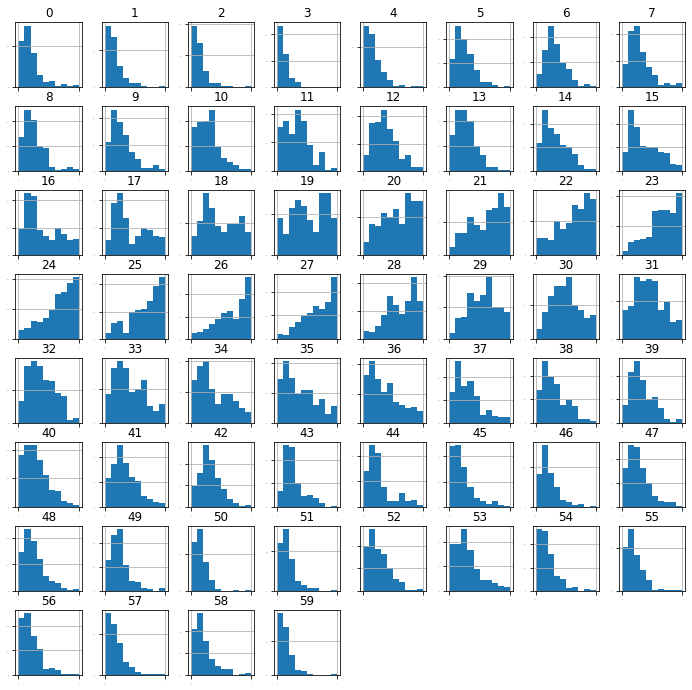

In [167]:
# visualize a minmax scaler transform of the sonar dataset
#from pandas import read_csv
#from pandas import DataFrame
#from pandas.plotting import scatter_matrix
#from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot
# load dataset
#url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
#dataset = read_csv(url, header=None)
# retrieve just the numeric input values
#data = dataset.values[:, :-1]
# perform a robust scaler transform of the dataset
#trans = MinMaxScaler()
#data = trans.fit_transform(data)
# convert the array back to a dataframe
dataset = DataFrame(data)
# summarize
print(dataset.describe())
# histograms of the variables
dataset.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(12,12))
pyplot.show()

In [155]:
# evaluate knn on the sonar dataset with minmax scaler transform
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
# load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
dataset = read_csv(url, header=None)
data = dataset.values
# separate into input and output columns
X, y = data[:, :-1], data[:, -1]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))
# define the pipeline
trans = MinMaxScaler()
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('t', trans), ('m', model)])
# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.813 (0.085)


**StandardScaler Transform**

Usaremos la configuración default y los valores de escala para restar la media para centrarlos en 0,0 y dividirlos por la desviación estándar para obtener la desviación estándar de 1,0. Primero, se define una instancia de StandardScaler con hiperparámetros predeterminados.

Una vez definida, podemos llamar a la función fit_transform() y pasarla a nuestro conjunto de datos para crear una versión transformada de ellos.

In [157]:
# perform a robust scaler transform of the dataset
trans = StandardScaler()
data = trans.fit_transform(dataset.values[:, :-1])

                 0             1             2             3             4   \
count  2.080000e+02  2.080000e+02  2.080000e+02  2.080000e+02  2.080000e+02   
mean   1.708035e-17  6.832142e-17 -1.195625e-16  1.622634e-16 -1.793437e-16   
std    1.002413e+00  1.002413e+00  1.002413e+00  1.002413e+00  1.002413e+00   
min   -1.206158e+00 -1.150725e+00 -1.104253e+00 -1.036115e+00 -1.236093e+00   
25%   -6.894939e-01 -6.686781e-01 -6.490624e-01 -6.359298e-01 -6.703975e-01   
50%   -2.774703e-01 -2.322506e-01 -2.486515e-01 -2.120457e-01 -2.292089e-01   
75%    2.784345e-01  2.893335e-01  3.682681e-01  2.285353e-01  4.524231e-01   
max    4.706053e+00  5.944643e+00  6.836142e+00  8.025419e+00  5.878863e+00   

                 5             6             7             8             9   \
count  2.080000e+02  2.080000e+02  2.080000e+02  2.080000e+02  2.080000e+02   
mean   2.049643e-16  1.024821e-16  3.416071e-17 -3.757678e-16  3.416071e-17   
std    1.002413e+00  1.002413e+00  1.002413e+00  1.

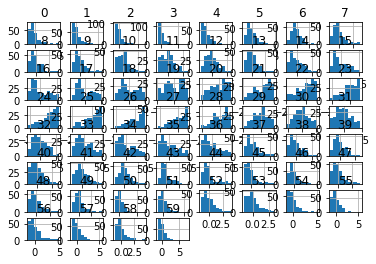

In [158]:
# visualize a standard scaler transform of the sonar dataset
from pandas import read_csv
from pandas import DataFrame
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot
# load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
dataset = read_csv(url, header=None)
# retrieve just the numeric input values
data = dataset.values[:, :-1]
# perform a robust scaler transform of the dataset
trans = StandardScaler()
data = trans.fit_transform(data)
# convert the array back to a dataframe
dataset = DataFrame(data)
# summarize
print(dataset.describe())
# histograms of the variables
dataset.hist()
pyplot.show()

In [160]:
# evaluate knn on the sonar dataset with standard scaler transform
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
# load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
dataset = read_csv(url, header=None)
data = dataset.values
# separate into input and output columns
X, y = data[:, :-1], data[:, -1]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))
# define the pipeline
trans = StandardScaler()
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('t', trans), ('m', model)])
# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.810 (0.080)
